Github Repository: https://github.com/beccaphilip/DSCI-100-Group-Project


In [16]:
#Load packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [3]:
#Read in Data
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [4]:
#Tidy Players by changing experience and gender into factor columns for categorical analysis
players_tidy <- players|>
    mutate(experience = as_factor(experience), gender = as_factor(gender), subscribe = as_factor(subscribe))
#Look at player characteristics with summary function
players_summary <- summary(players_tidy)
players_summary

    experience subscribe   hashedEmail         played_hours    
 Pro     :14   FALSE: 52   Length:196         Min.   :  0.000  
 Veteran :48   TRUE :144   Class :character   1st Qu.:  0.000  
 Amateur :63               Mode  :character   Median :  0.100  
 Regular :36                                  Mean   :  5.846  
 Beginner:35                                  3rd Qu.:  0.600  
                                              Max.   :223.100  
                                                               
     name                         gender         Age       
 Length:196         Male             :124   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Non-binary       : 15   Median :19.00  
                    Prefer not to say: 11   Mean   :21.14  
                    Agender          :  2   3rd Qu.:22.75  
                    Two-Spirited     :  6   Max.   :58.00  
                    Other            :  1   NA's   :2      

## Data Description
The players data set includes 196 observations, representing data for 196 different players. One aspect of the data is that the majority of the player data is categorical, which influenced our choice to use player age and total played hours as predictor variables for subscription stats. However, the median played hours are = 0.1, which may be an issue in using this variable as a predictor. 

The tidied players data includes player characteristic variables such as:
- age (double)
- gender (factor)
- experience level (factor)
- subscribed (factor, subscribed yes/no)
- total playing time (all sessions per player; double)
- hashed emails (player IDs; character)
- names (IDs; character)
### Player Characteristics
|Total Players|Experience Level|Players|Gender|Players|Subscribed|Players|Age Range|Years|Total Played Time|Hours|
|-------------|----------------|-------|------|-------|----------|-------|---------|-----|---------------|-----|
|196|Pro|14|Male|124|Yes|144|Minimum Age|9|Minimum Hours|0.00|
| |Veteren|48|Female|37|No|52|1st Quartile|17.00|1st Quartile|0.00|
| |Amateur|63|Non-binary|15| | |Median Age|19|Median Hours|0.10|
| |Regular|36|Prefer not to say|11| | |Mean Age|21.14|Mean Hours|5.85|
| |Beginner|35|Agender|2| | |3rd Quartile|22.75|3rd Quartile|0.60|
| |        |   |Two_spirited|6| | |Maximum Age|58|Maximum Hours|223.10|
| |        |   |Other|1| | | | | | |

In [5]:
#Create Table for mean age and played hours from players_tidy
players_means <- summarise(players_tidy, mean_age = round(mean(Age, na.rm = TRUE), 2), 
                           mean_played_hours = round(mean(played_hours), 2))
players_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


In [66]:
#Calculate and plot mean playing hours in each age
age_mean <- players_tidy |>
  group_by(Age)|>
  summarize(
    mean_playing_hours = mean(played_hours, na.rm = TRUE),
  )
age_mean

Age,mean_playing_hours
<dbl>,<dbl>
9,30.3000000
10,3.6000000
11,2.9000000
12,0.5000000
14,8.7000000
15,0.1000000
16,50.0333333
17,4.8863014
18,0.2285714


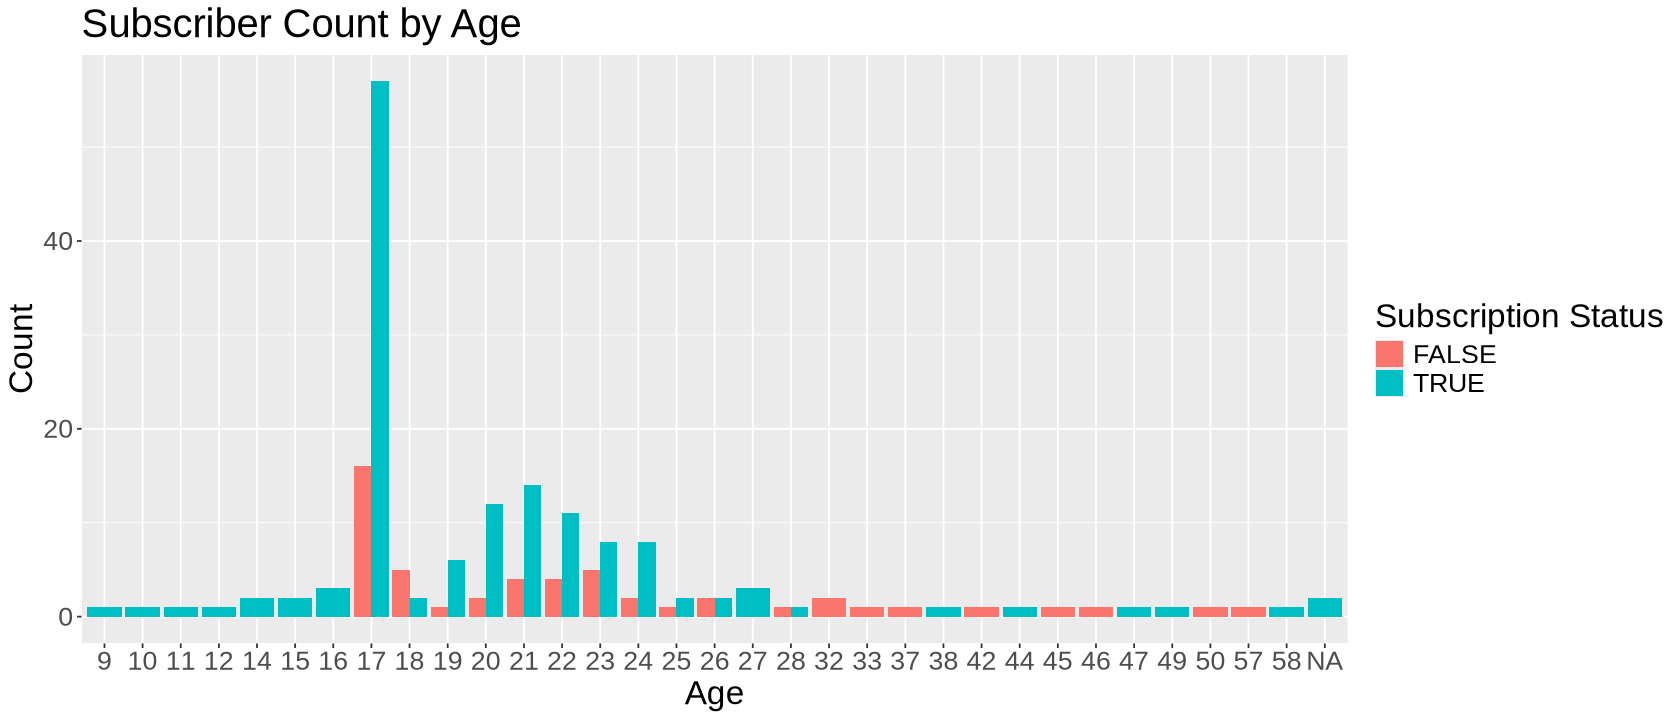

In [10]:
#Draw the plot to show the subscribe situation in different age
options(repr.plot.height = 6, repr.plot.width=14)
subscribe_plot_age <- ggplot(data = players_tidy, aes(x = factor(Age), fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscriber Count by Age",
    x = "Age",
    y = "Count",
    fill = "Subscription Status" 
  ) +
theme(text=element_text(size = 20))
subscribe_plot_age

From the plot between subscribers and age, we can clearly see that most subscriptions occur between the ages of 17-24, with the age of 17 having the largest number of subscribers. When ages exceed 28, there are less people subscribing compared to ages below 28, so we can primary find a relationship between ages and whether they subscibe to the newsletter.

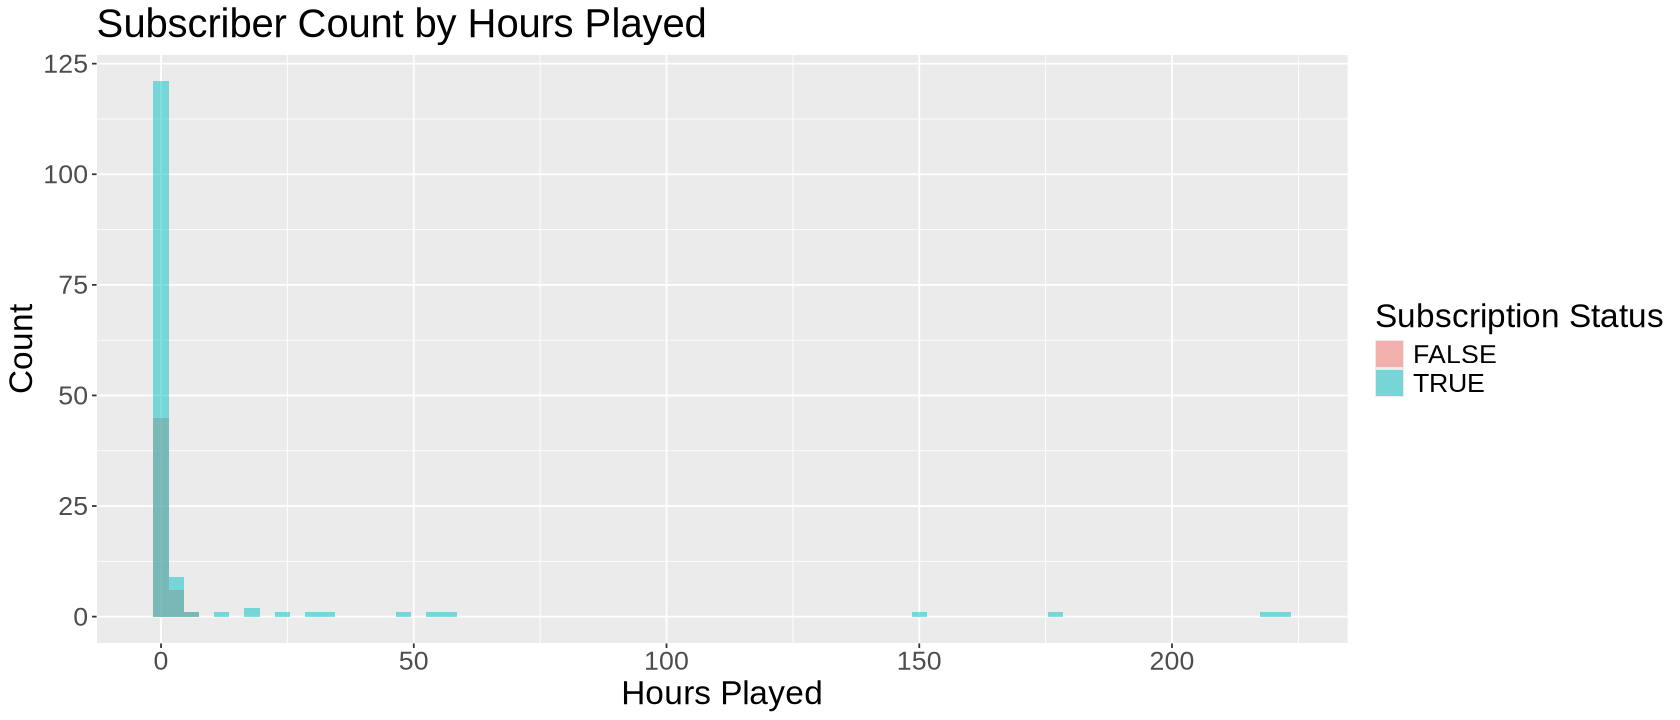

In [60]:
#Create a plot for subscription counts across played hour values
options(repr.plot.height = 6, repr.plot.width=14)
subscribe_plot_hours <- players_tidy |>
ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 3) +
  labs(
    title = "Subscriber Count by Hours Played",
    x = "Hours Played",
    y = "Count",
    fill = "Subscription Status") +
theme(text=element_text(size = 20))
subscribe_plot_hours

This plot shows us that many players in the data set have 0 playing hours; this was also seen in our data summary that showed median playing hours = 0.1, where the mean hours = 5.8 was likely influenced by a couple of high play hour outliers. Despite a lack of playing, we can see in this plot that more of the 0 hour players still subscribed to the newsletter. Thus we are going to compare two versions of the data set for our classification model, one that includes the 0 hour players, and one with those player excluded. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


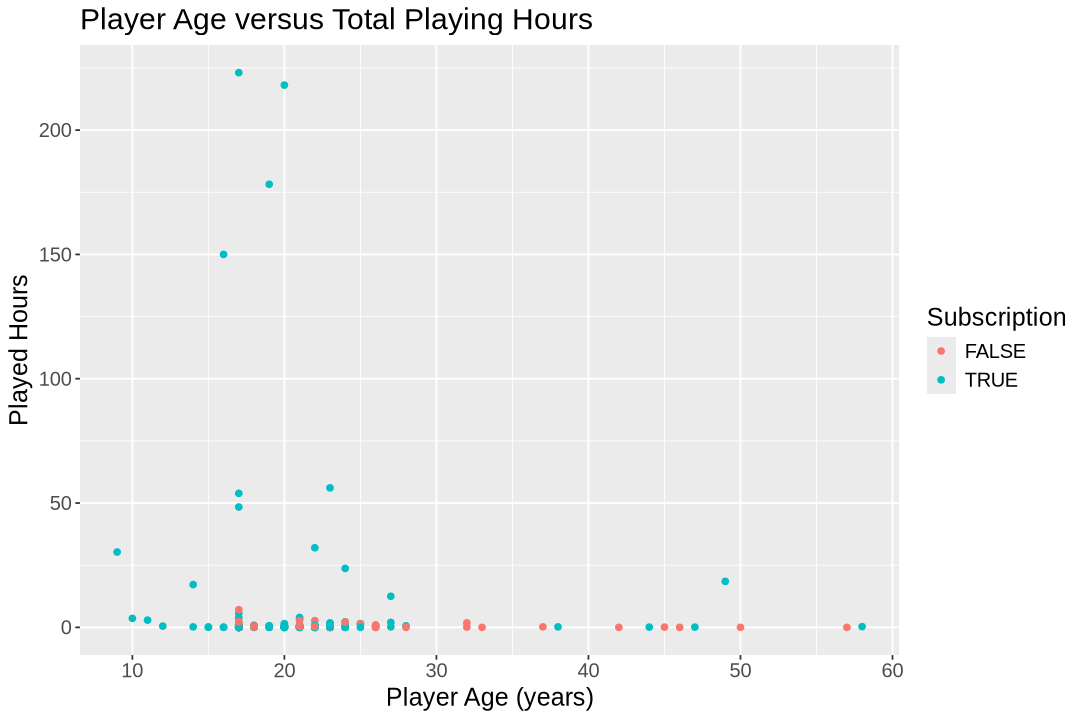

In [65]:
#Plot each combination of predictor variables to look for relationships
options(repr.plot.height=6, repr.plot.width=9)

age_hours_plot <- players_tidy |>
    ggplot(aes(x=Age, y=played_hours, color=subscribe))+geom_point()+ 
    labs(x="Player Age (years)", y="Played Hours", color="Subscription")+
    ggtitle("Player Age versus Total Playing Hours")+
    theme(text=element_text(size=15))
age_hours_plot


The above plot shows that most subscribed players are in the younger half of the overall age distribution, though there are only a few players with played hours above 50. As we lack any players above the age of 30 who play more than 25 hours, the predictive capability of the model may not be very strong for new unlabelled data in the older and higher played hours ranges. 

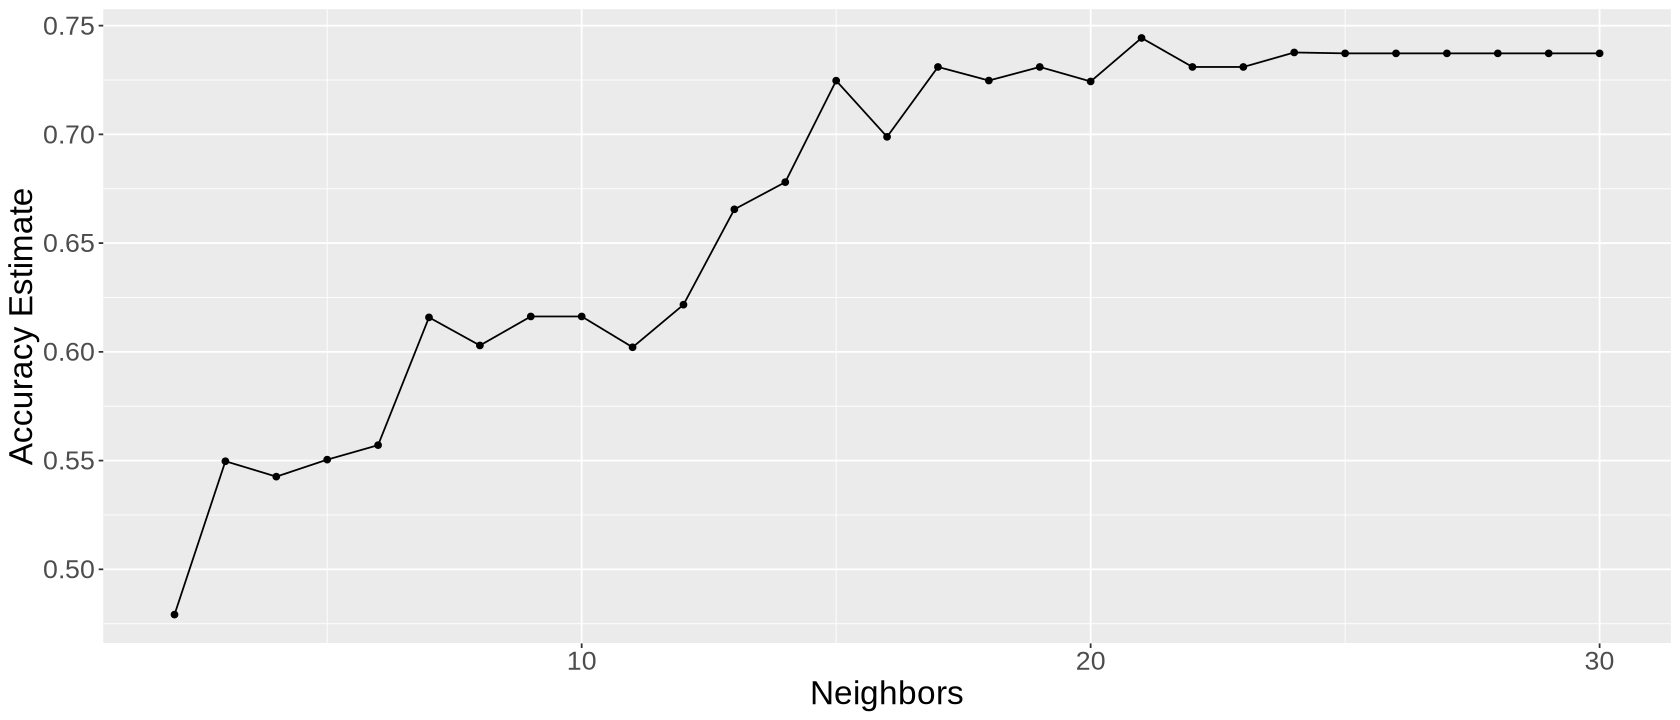

In [52]:
set.seed(1)

players_split <- initial_split(players_tidy, prop = 0.8,strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe~Age+played_hours, data = players_train)|>
step_impute_mean(all_numeric_predictors()) |>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

metrics <- workflow() |>
            add_recipe(players_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = vfold, grid = tibble(neighbors = seq(from=2, to=30, by=1))) |>
            collect_metrics()

accuracy <- metrics |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) 

cross_val_plot

In [67]:
tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
       set_engine("kknn") |>
       set_mode("classification")

tuned_fit <- workflow() |>
             add_recipe(players_recipe) |>
             add_model(tuned_spec) |>
            fit(data = players_train)

players_predictions <- predict(tuned_fit, players_test) |>
                        bind_cols(players_test)

tuned_metrics <- players_predictions |> metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat <- players_predictions |>
                        conf_mat(truth = subscribe, estimate = .pred_class) 
tuned_metrics
players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.72500000
kap,binary,0.07563025


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     10   28

In [38]:
players_no_zero <- players_tidy |>
    filter(played_hours != 0)
players_no_zero

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


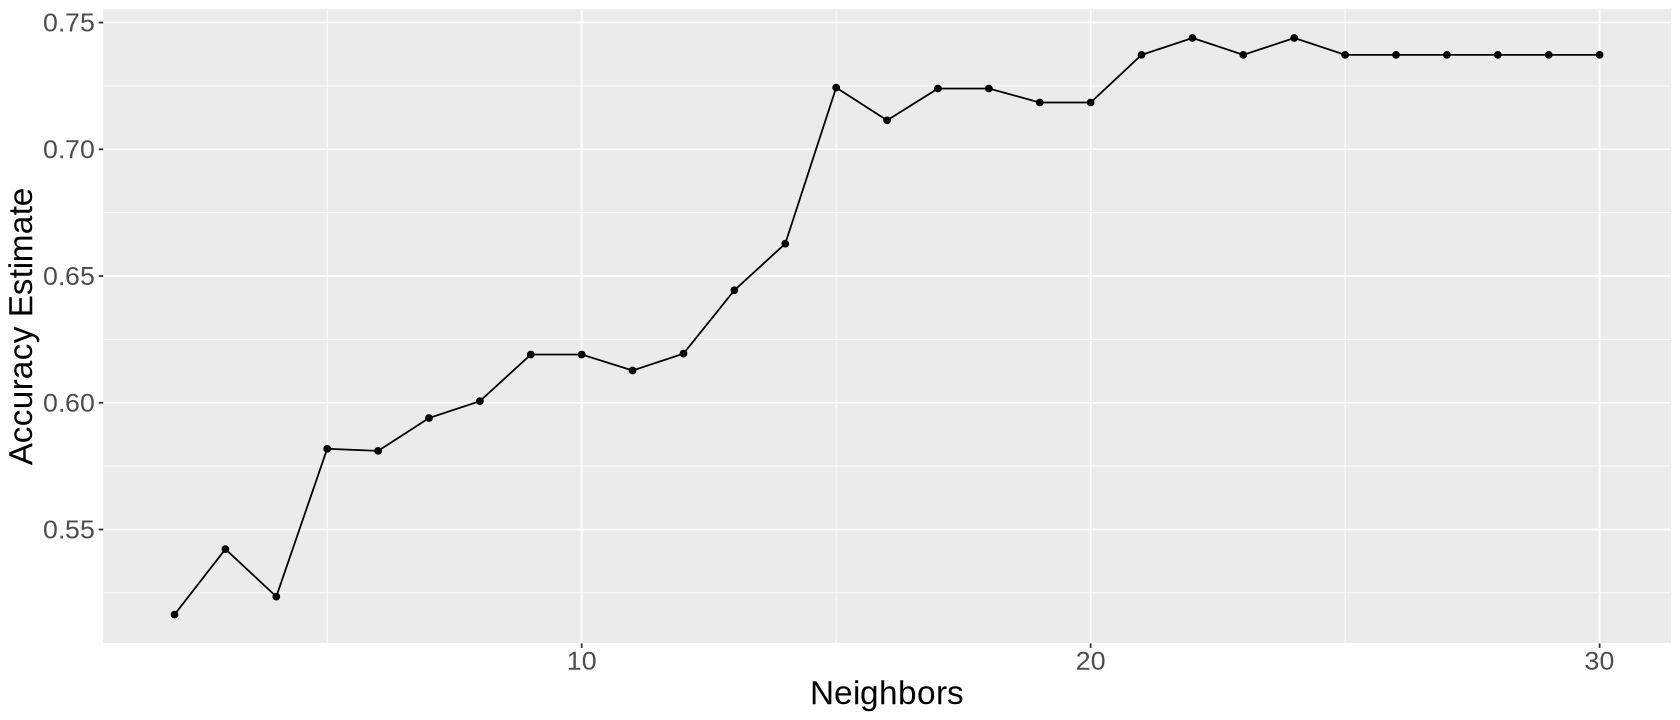

In [55]:
set.seed(1)

players_resplit <- initial_split(players_no_zero, prop = 0.8,strata = subscribe)
players_retrain <- training(players_resplit)
players_retest <- testing(players_resplit)

players_new_recipe <- recipe(subscribe~Age+played_hours, data = players_retrain)|>
step_impute_mean(all_numeric_predictors()) |>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_new_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

new_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

new_metrics <- workflow() |>
            add_recipe(players_new_recipe) |>
            add_model(knn_new_spec) |>
            tune_grid(resamples = new_vfold, grid = tibble(neighbors = seq(from=2, to=30, by=1))) |>
            collect_metrics()

new_accuracy <- new_metrics |>
                 filter(.metric == 'accuracy')

new_crossval_plot <- ggplot(new_accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) 

new_crossval_plot

In [57]:
new_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 22) |>
       set_engine("kknn") |>
       set_mode("classification")

new_tuned_fit <- workflow() |>
             add_recipe(players_new_recipe) |>
             add_model(new_tuned_spec) |>
            fit(data = players_retrain)

new_players_predictions <- predict(new_tuned_fit, players_retest) |>
                        bind_cols(players_retest)

new_tuned_metrics <- new_players_predictions |> metrics(truth = subscribe, estimate = .pred_class)

new_players_conf_mat <- new_players_predictions |>
                        conf_mat(truth = subscribe, estimate = .pred_class) 
new_tuned_metrics
new_players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7826087
kap,binary,0.0000000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      5   18